## 读取数据

In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


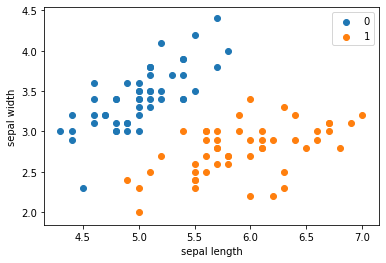

In [4]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [5]:
data = df.iloc[:100, [0, 1, -1]].values
X, y = data[:,:-1], data[:,-1]
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

## 假设分布为高斯分布
<img src="picture/gauss.png" width = "300" height = "200">

In [89]:
class NaiveBayes:
    
    def __init__(self):
        self.model = None
    
    def mean(self, x):
        return np.sum(x) / len(x)
    def std(self, x):
        mean = self.mean(x)
        std = math.sqrt(np.sum([np.power((i-mean), 2) for i in x]) / len(x))
        return std
    def gaussian_probability(self, x, mean, std):
        temp = math.exp(-(np.power((x - mean), 2) / (2 * np.power(std,2))))
        return (1 / np.sqrt(2 * math.pi * np.power(std, 2))) * temp
    # 计算均值与标准差
    def summarize(self, train_data):
        summaries = [(self.mean(i), self.std(i)) for i in zip(*train_data)]
        return summaries
    def fit(self, X, y):
        labels = list(set(y))
        data = {label: [] for label in labels}
        for x, label in zip(X,y):
            data[label].append(x)
        self.model = {
            k: self.summarize(v)
            for k, v in data.items()
        }
        return "Gauss trian Done!"
    def calculate_probabilities(self, input_data, y):
        pro = {}
        for label, value in self.model.items():
            pro[label] = list(y).count(label) / len(y)
            for i in range(len(value)):
                mean, std = value[i]
                pro[label] *= self.gaussian_probability(
                    input_data[i], mean, std
                ) 
        return pro

    def predict(self, X_test, y):
        label = sorted(
            self.calculate_probabilities(X_test, y).items(),
            key=lambda x: x[-1])[-1][0]
        return label
        
    def score(self, X_test, y_test, train_y):
        right = 0
        for X, y in zip(X_test, y_test):
            label = self.predict(X, train_y)
            if label == y:
                right += 1

        return right / len(X_test)  

In [90]:
model = NaiveBayes()

In [91]:
model.fit(train_x, train_y)

'Gauss trian Done!'

In [102]:
test_point = [6, 2.5]
print(model.predict(test_point, train_y))

1.0


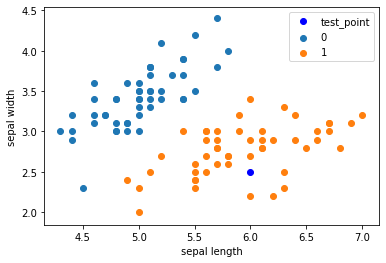

In [103]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.plot(test_point[0], test_point[1], 'bo', label='test_point')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [104]:
model.score(test_x, test_y, train_y)

1.0